# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/covid19-dataset/Covid Data.csv


# Load Data

In [2]:
df = pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# Data Information, Cleaning & Visualization

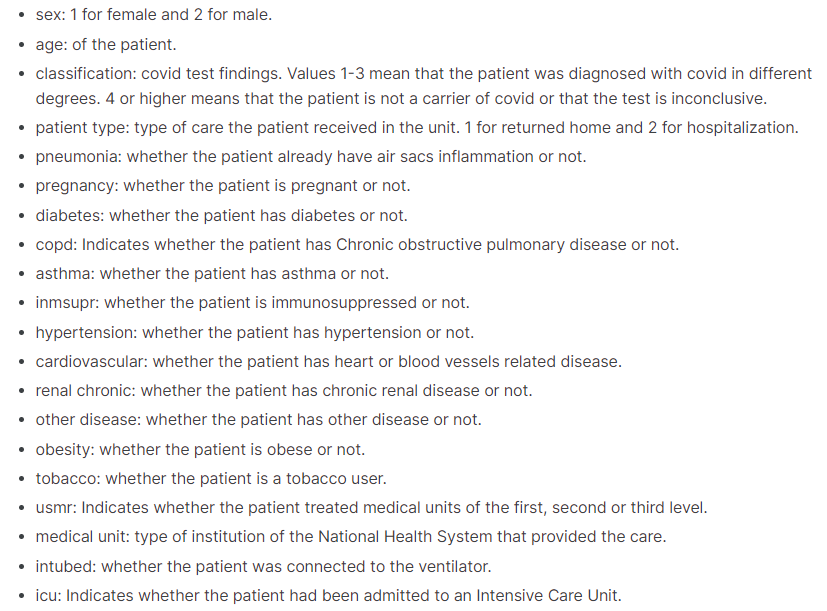

In [3]:
df.drop(["DATE_DIED"], axis = 'columns',  inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   INTUBED               1048575 non-null  int64
 5   PNEUMONIA             1048575 non-null  int64
 6   AGE                   1048575 non-null  int64
 7   PREGNANT              1048575 non-null  int64
 8   DIABETES              1048575 non-null  int64
 9   COPD                  1048575 non-null  int64
 10  ASTHMA                1048575 non-null  int64
 11  INMSUPR               1048575 non-null  int64
 12  HIPERTENSION          1048575 non-null  int64
 13  OTHER_DISEASE         1048575 non-null  int64
 14  CARDIOVASCULAR        1048575 non-null  int64
 15  OBESITY        

In [5]:
df.size

20971500

In [6]:
df.shape

(1048575, 20)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


In [8]:
df.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [9]:
df_corr = df.corr()
df_corr

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


In [10]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

<AxesSubplot:>

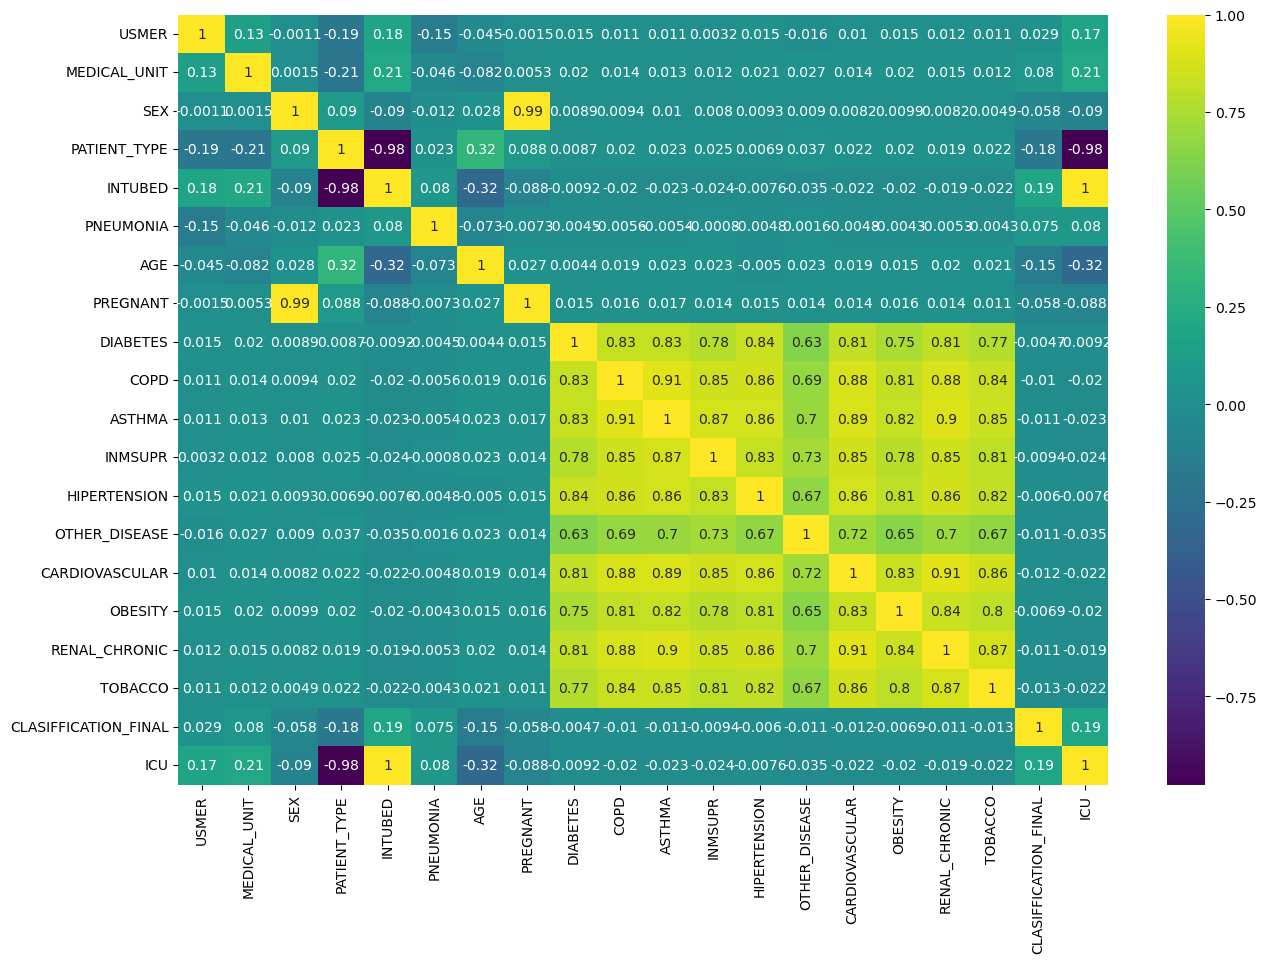

In [11]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_corr, cmap = 'viridis', annot = True)

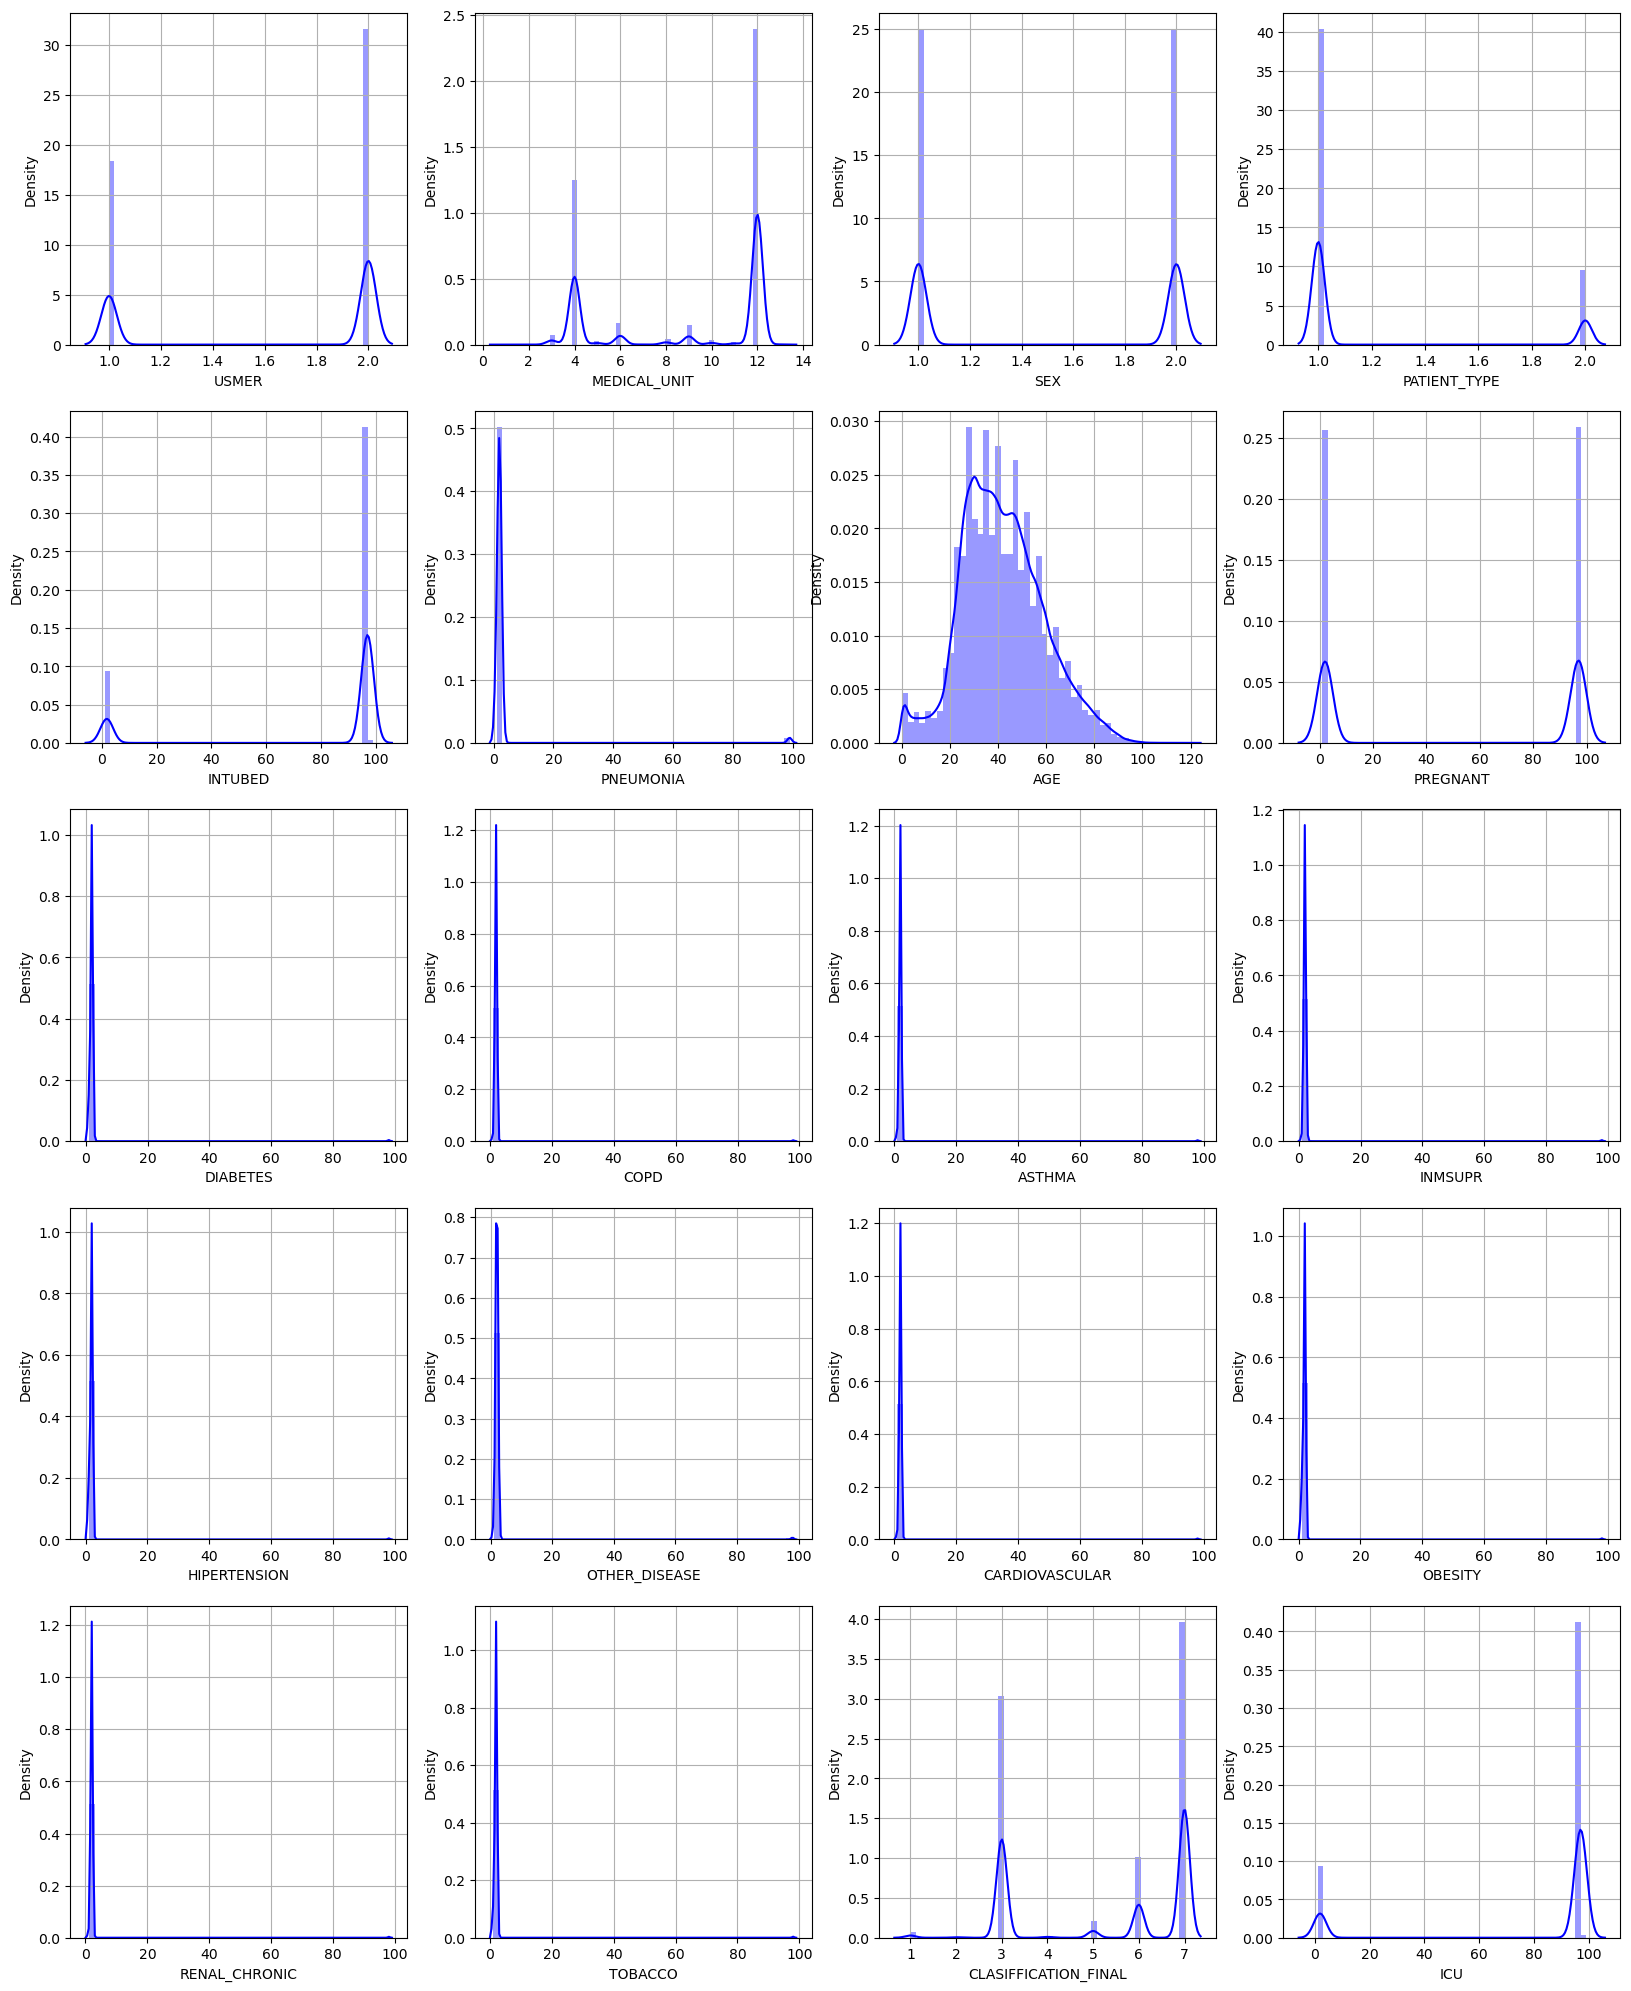

In [12]:
plt.figure(figsize = (20, 25))

for i in range(len(df.columns)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df.iloc[:, i], color = 'blue')
    plt.grid()

## **Note**

### *As observed from the above analysis, The "CLASSIFFICATION_FINAL" attribute has values ranging from 1 to 7. But for our ease of action, we are converting the limit starting from 0 to 6.*

In [13]:
df['CLASIFFICATION_FINAL'] = df.CLASIFFICATION_FINAL.apply(lambda x: x-1)

In [14]:
df.CLASIFFICATION_FINAL.value_counts()

6    499250
2    381527
5    128133
4     26091
0      8601
3      3122
1      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [15]:
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

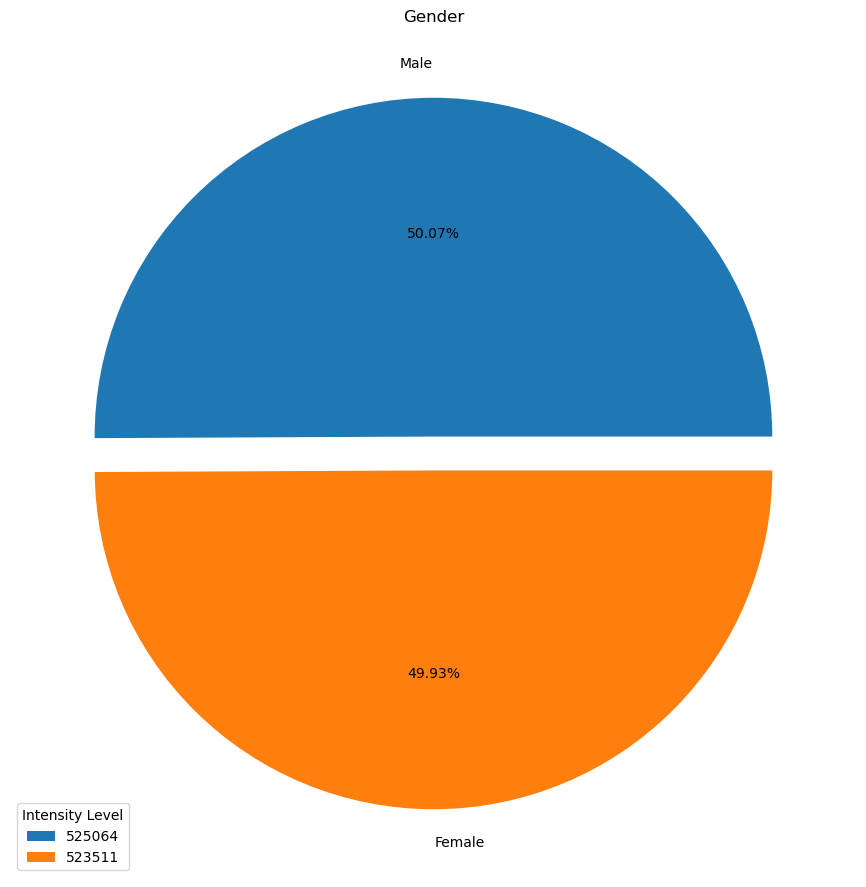

In [16]:
plt.figure(figsize = (15, 11))
plt.title("Gender")
plt.pie(df.SEX.value_counts(), explode = (0.05, 0.05), labels = ['Male', 'Female'],autopct = '%1.2f%%')
plt.legend(df.SEX.value_counts(), loc = 'lower left', title = 'Intensity Level')

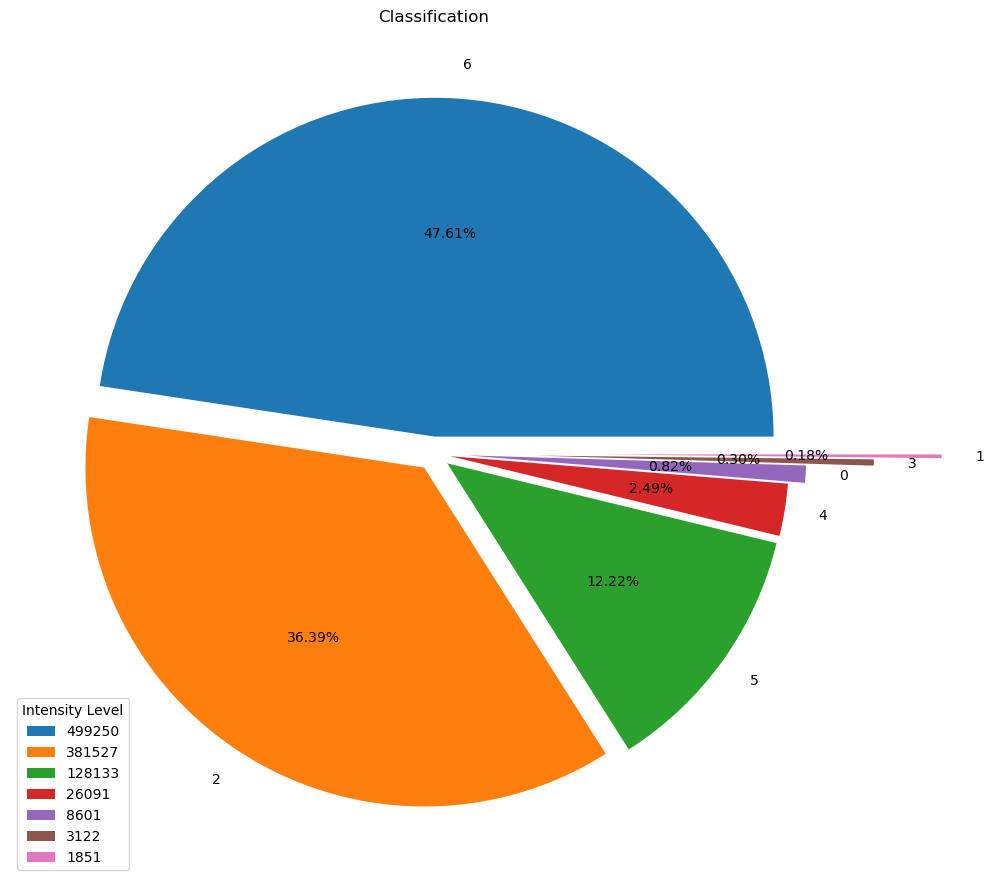

In [17]:
plt.figure(figsize = (15, 11))
plt.title("Classification")
plt.pie(df.CLASIFFICATION_FINAL.value_counts(), explode = (0.05, 0.05, 0.05, 0.05, 0.1, 0.3, 0.5), labels = ['6', '2', '5', '4', '0', '3', '1'],autopct = '%1.2f%%')
plt.legend(df.CLASIFFICATION_FINAL.value_counts(), loc = 'lower left', title = 'Intensity Level')

<AxesSubplot:title={'center':'SEX = 2'}, xlabel='CLASIFFICATION_FINAL', ylabel='Density'>

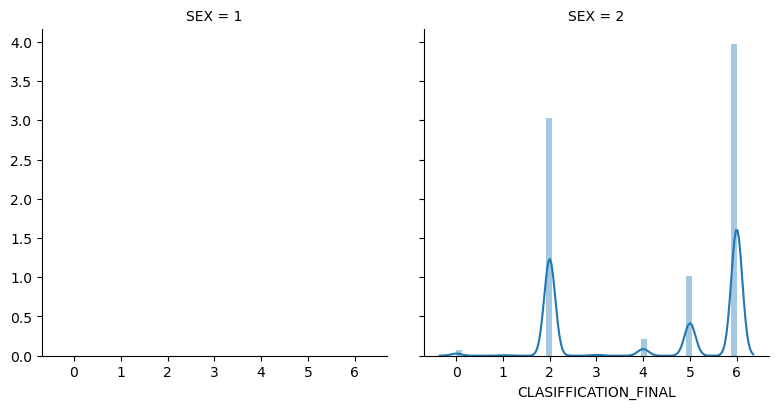

In [18]:
sns.FacetGrid(df, col = 'SEX', height = 4)
sns.distplot(df['CLASIFFICATION_FINAL'])

# Train & Test Split

In [19]:
x = df.loc[:, df.columns.drop('CLASIFFICATION_FINAL')]
x = StandardScaler().fit_transform(x)
x

array([[ 0.76275324, -2.14342559, -0.99852004, ..., -0.05008022,
        -0.0402647 ,  0.47377997],
       [ 0.76275324, -2.14342559,  1.00148216, ..., -0.24480886,
        -0.0402647 ,  0.47377997],
       [ 0.76275324, -2.14342559,  1.00148216, ..., -0.05008022,
        -0.0402647 , -2.10612542],
       ...,
       [ 0.76275324,  1.07954257,  1.00148216, ..., -0.05008022,
        -0.0402647 ,  0.47377997],
       [ 0.76275324,  1.07954257,  1.00148216, ..., -0.05008022,
        -0.0402647 ,  0.47377997],
       [ 0.76275324,  1.07954257,  1.00148216, ..., -0.05008022,
        -0.0402647 ,  0.47377997]])

In [20]:
y = df['CLASIFFICATION_FINAL'].values
y

array([2, 4, 2, ..., 6, 6, 6])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [22]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm.plot()

# Logistic Regression

In [23]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.5365145769026586
Recall :  0.5365145769026586
Accuracy :  0.5365145769026586
F1 Score :  0.5365145769026586

 [[     0      0    743      0      0      0   1892]
 [     0      0    546      0      0      0     20]
 [     1      0  37925      0      0     15  76477]
 [     0      0    175      0      0      0    741]
 [     0      0   1726      0      0     54   6190]
 [     0      0   7731      0      0   2705  28074]
 [     0      0  20875      0      0    540 128143]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.54      0.33      0.41    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.82      0.07  

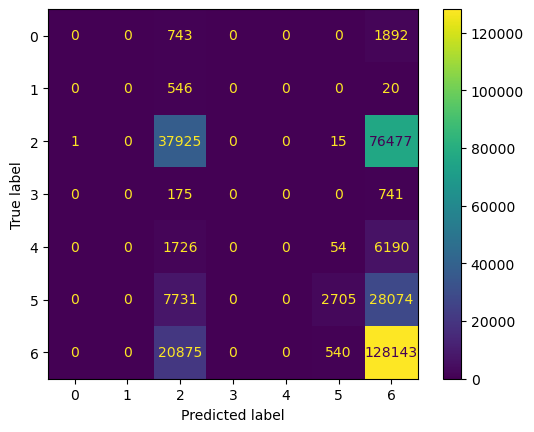

In [25]:
perform(y_pred_lr)

In [26]:
filename = 'Covid_Classification_lr.h5'
pickle.dump(model_lr, open(filename, 'wb'))

# XGBoost Classifier

In [27]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [28]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  0.5496339482409488
Recall :  0.5496339482409488
Accuracy :  0.5496339482409488
F1 Score :  0.5496339482409488

 [[     5      0    779      0      0    219   1632]
 [     0      0    513      0      0     12     41]
 [     3      0  42471      0      1    843  71100]
 [     0      0    180      0      0      2    734]
 [     0      0   1830      0      2    120   6018]
 [     4      0   9768      0      3   4610  24125]
 [     0      0  22039      0      9   1698 125812]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.42      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.55      0.37      0.44    114418
           3       0.00      0.00      0.00       916
           4       0.13      0.00      0.00      7970
           5       0.61      0.12  

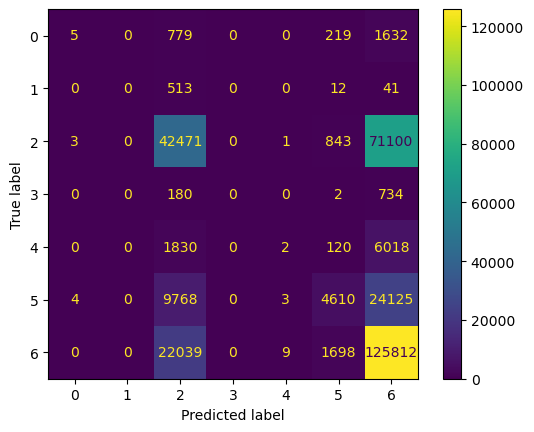

In [29]:
perform(y_pred_xgb)

In [30]:
filename = 'Covid_Classification_xgb.h5'
pickle.dump(model_xgb, open(filename, 'wb'))

# XGBRF Classifier

In [31]:
model_xgbrf = XGBRFClassifier()
model_xgbrf.fit(x_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=None, ...)

In [32]:
y_pred_xgbrf = model_xgbrf.predict(x_test)

Precision :  0.5408855814071774
Recall :  0.5408855814071774
Accuracy :  0.5408855814071774
F1 Score :  0.5408855814071774

 [[     0      0    915      0      0      0   1720]
 [     0      0    539      0      0      0     27]
 [     0      0  35677      0      0      1  78740]
 [     0      0    176      0      0      0    740]
 [     0      0   1570      0      0     51   6349]
 [     0      0   6530      0      0   2695  29285]
 [     0      0  17265      0      0    517 131776]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.57      0.31      0.40    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.83      0.07  

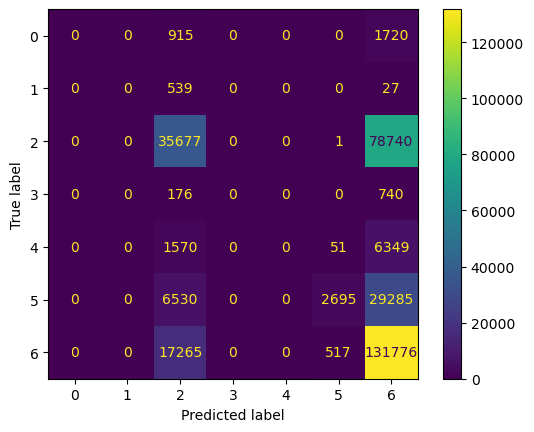

In [33]:
perform(y_pred_xgbrf)

In [34]:
filename = 'Covid_Classification_xgbrf.h5'
pickle.dump(model_xgbrf, open(filename, 'wb'))

# Decision Tree

In [35]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.5220600623702606
Recall :  0.5220600623702606
Accuracy :  0.5220600623702606
F1 Score :  0.5220600623702606

 [[    86     11    723      3     25    288   1499]
 [     3     10    427      0     12     34     80]
 [   463    248  41160     75    617   3743  68112]
 [     2      1    181      1      0     13    718]
 [    31      4   1963      7     85    333   5547]
 [   228     29  10120     12    163   5851  22107]
 [   306     91  26807     52    663   4606 117033]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.08      0.03      0.05      2635
           1       0.03      0.02      0.02       566
           2       0.51      0.36      0.42    114418
           3       0.01      0.00      0.00       916
           4       0.05      0.01      0.02      7970
           5       0.39      0.15  

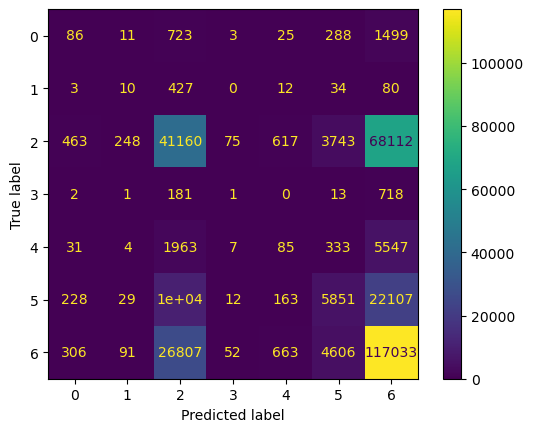

In [37]:
perform(y_pred_dt)

In [38]:
filename = 'Covid_Classification_dt.h5'
pickle.dump(model_dt, open(filename, 'wb'))

# Random Forest

In [39]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.5269969132760918
Recall :  0.5269969132760918
Accuracy :  0.5269969132760918
F1 Score :  0.5269969132760918

 [[    42      4    717      1     18    298   1555]
 [     1      9    418      0      5     35     98]
 [   204    118  39942     43    410   3515  70186]
 [     0      1    172      1      4      8    730]
 [    12      3   1853      2     51    308   5741]
 [   117     14   9427      9    108   5897  22938]
 [   137     54  24932     26    389   4183 119837]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.08      0.02      0.03      2635
           1       0.04      0.02      0.02       566
           2       0.52      0.35      0.42    114418
           3       0.01      0.00      0.00       916
           4       0.05      0.01      0.01      7970
           5       0.41      0.15  

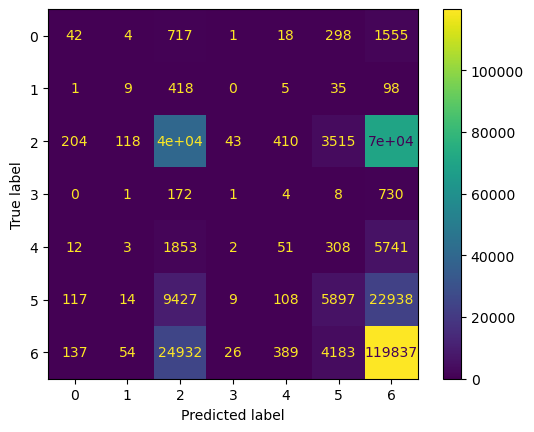

In [41]:
perform(y_pred_rf)

In [42]:
filename = 'Covid_Classification_rf.h5'
pickle.dump(model_rf, open(filename, 'wb'))

# ADABoost Classifier

In [43]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [44]:
y_pred_ada = model_ada.predict(x_test)

Precision :  0.532951016139338
Recall :  0.532951016139338
Accuracy :  0.532951016139338
F1 Score :  0.532951016139338

 [[     0     16    818      0      0      3   1798]
 [     0     36    512      0      0      2     16]
 [     0   1226  39958      0      0     42  73192]
 [     0      0    178      0      0      1    737]
 [     0     25   1827      0      0    111   6007]
 [     0    121   9119      0      0   1702  27568]
 [     0    315  22127      0      0   1160 125956]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.02      0.06      0.03       566
           2       0.54      0.35      0.42    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.56      0.04      

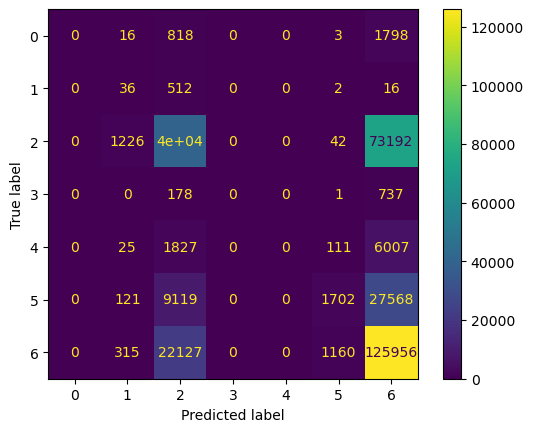

In [45]:
perform(y_pred_ada)

In [46]:
filename = 'Covid_Classification_ada.h5'
pickle.dump(model_ada, open(filename, 'wb'))

# ExtraTrees Classifier

In [47]:
model_etc = ExtraTreesClassifier()
model_etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [48]:
y_pred_etc = model_etc.predict(x_test)

Precision :  0.5254678564276019
Recall :  0.5254678564276019
Accuracy :  0.5254678564276019
F1 Score :  0.5254678564276019

 [[    68      8    758      1     16    279   1505]
 [     1     12    431      0      6     33     83]
 [   361    182  41597     42    467   3432  68337]
 [     0      1    185      1      3      9    717]
 [    19      4   1961      3     65    310   5608]
 [   189     23  10080     13    124   5888  22193]
 [   223     78  26811     33    482   4264 117667]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.08      0.03      0.04      2635
           1       0.04      0.02      0.03       566
           2       0.51      0.36      0.42    114418
           3       0.01      0.00      0.00       916
           4       0.06      0.01      0.01      7970
           5       0.41      0.15  

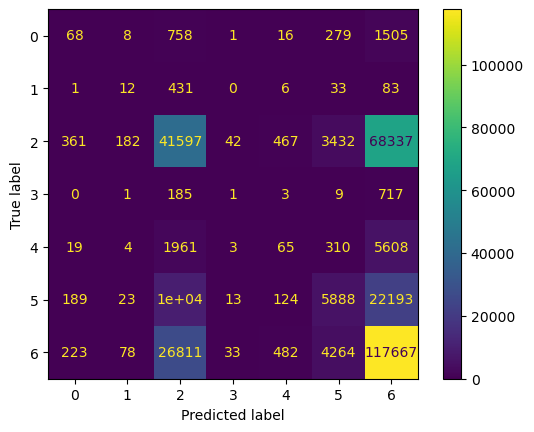

In [49]:
perform(y_pred_etc)

In [50]:
filename = 'Covid_Classification_etc.h5'
pickle.dump(model_etc, open(filename, 'wb'))

# GradientBoosting Classifier

In [51]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [52]:
y_pred_gbc = model_gbc.predict(x_test)

Precision :  0.5473769204604336
Recall :  0.5473769204604336
Accuracy :  0.5473769204604336
F1 Score :  0.5473769204604336

 [[     0      0    933      0      0     14   1688]
 [     0      0    524      0      0      5     37]
 [     0      0  41416      0      0    368  72634]
 [     0      0    179      0      0      0    737]
 [     1      0   1809      0      0     85   6075]
 [     0      0   9319      0      0   3760  25431]
 [     0      0  21290      0      0   1254 127014]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.55      0.36      0.44    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.69      0.10  

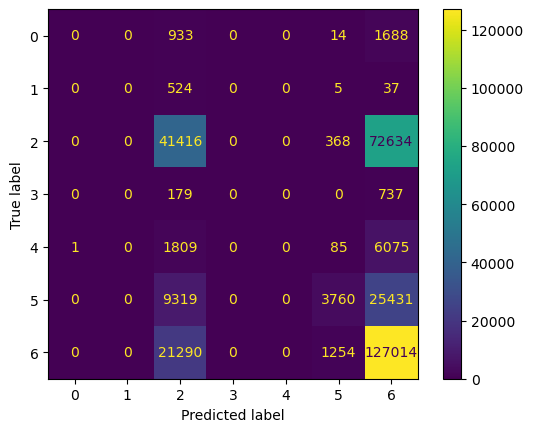

In [53]:
perform(y_pred_gbc)

In [54]:
filename = 'Covid_Classification_gbc.h5'
pickle.dump(model_gbc, open(filename, 'wb'))

# MLP

In [55]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

MLPClassifier()

In [56]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.54542824717951
Recall :  0.54542824717951
Accuracy :  0.54542824717951
F1 Score :  0.54542824717951

 [[     0      0    845      0      0     52   1738]
 [     1      0    499      0      0      3     63]
 [     4      4  40501      1      0    781  73127]
 [     0      0    166      0      0      0    750]
 [     0      0   1743      0      0    112   6115]
 [     0      0   9747      0      1   4287  24475]
 [     0      0  21052      4      0   1713 126789]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.54      0.35      0.43    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.62      0.11      0.19

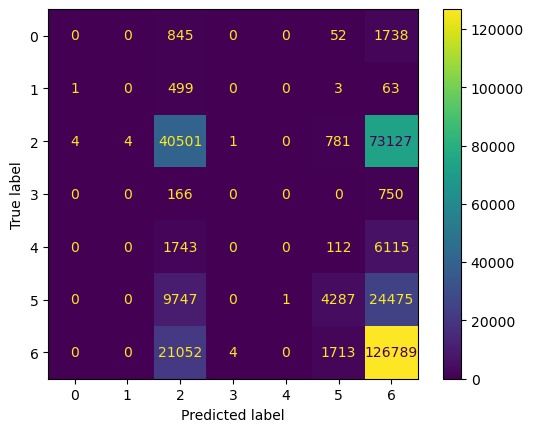

In [57]:
perform(y_pred_mlp)

In [58]:
filename = 'Covid_Classification_mlp.h5'
pickle.dump(model_mlp, open(filename, 'wb'))

## **Conclusion**

### *Though we have applied machine learning techniques to classify COVID and gathered an accuracy of ~55%, but Doctor's decision will be considered and treated as final, as he/she takes that decision based on certain parameters, comorbidities and experience gathered over years.*

<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you For viewing this Notebook 😃, do upvote 🔼 if you like it and please feel free to provide any feedback.</em>
<p style="text-align:center"><img src="https://cdn.dribbble.com/users/126069/screenshots/2253470/screengif7.gif" width="480" height="200"></p>